<a href="https://colab.research.google.com/github/Carissa689/Analysis-Design-of-Information-Systems/blob/main/ANALISIS_PREDIKTIF_HARGA_JUAL_MOBIL_MENGGUNAKAN_ALGORITMA_REGRESI_LINEAR_DAN_RANDOM_FOREST_REGRESSOR_UNTUK_STUDI_PERBANDINGAN_PERFORMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

# Unggah file
uploaded = files.upload()

Saving dataset-car-sales.csv to dataset-car-sales.csv


In [4]:
import shutil

# Nama file hasil upload
original_file = 'dataset-car-sales.csv'

# Pindahkan file ke /tmp
shutil.move(original_file, f'/tmp/{original_file}')


'/tmp/dataset-car-sales.csv'

In [5]:
file_path = '/tmp/dataset-car-sales.csv'

# Membaca file
import pandas as pd
data = pd.read_csv(file_path)
print(data.head())


    brandName carCondition  carEngine                                 carId  \
0      Suzuki         Used       1785  289f29f6-de5e-4667-8b58-06d42701b465   
1       Honda         Used       1139  741b34b7-b6f5-46ac-8aa7-f4d75c0d6a33   
2      Toyota         Used       1350  adccfbae-d64a-40cd-a4b4-4acef350fcc0   
3      Nissan         Used       3418  642a1697-1466-49d1-b166-c094bf126e2a   
4  Mitsubishi         Used       1893  4d2f6dd3-486c-4232-abb9-733bc2a5d6d5   

  carListingDate  carMileage    carTag carTransmissionName carTypeName  \
0     2022-10-03       69018   dolorum           Automatic         SUV   
1     2023-05-08      132816  mollitia              Manual       Truck   
2     2022-09-05       12903      esse              Manual         MPV   
3     2023-01-09       62653      quod              Manual         MPV   
4     2022-11-18      102526   maiores              Manual         MPV   

   carYear colorName dealerTypeName  expSellingPrice fuelTypeName modelName  \
0

In [6]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Jalur file yang sudah diunggah dan disalin ke /tmp
file_path = '/tmp/dataset-car-sales.csv'  # Sesuaikan dengan nama file yang sudah diunggah

# Load dataset
try:
    data = pd.read_csv(file_path)
    print("Dataset berhasil dimuat!")
    print(data.head())  # Menampilkan 5 baris pertama untuk memastikan data terload
except FileNotFoundError:
    print("File tidak ditemukan di direktori /tmp.")
    data = None
except Exception as e:
    print(f"Terjadi kesalahan: {e}")
    data = None

# Pastikan data telah berhasil dimuat sebelum melanjutkan
if data is not None:
    # Menggunakan Label Encoding untuk kolom kategorikal
    le = LabelEncoder()
    data['carTransmissionName'] = le.fit_transform(data['carTransmissionName'])

    # Feature selection (sesuaikan dengan kolom yang relevan dari dataset)
    X = data[['carYear', 'carMileage', 'carEngine', 'carTransmissionName']]  # Fitur-fitur yang digunakan untuk prediksi
    y = data['expSellingPrice']  # Target adalah harga jual yang diprediksi

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression Model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Predictions with Linear Regression
    y_pred_lr = lr_model.predict(X_test)

    # Evaluation metrics for Linear Regression
    mae_lr = mean_absolute_error(y_test, y_pred_lr)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    r2_lr = r2_score(y_test, y_pred_lr)

    print("\nLinear Regression Results")
    print(f"Mean Absolute Error (MAE): {mae_lr}")
    print(f"Mean Squared Error (MSE): {mse_lr}")
    print(f"R-squared (R²): {r2_lr}")

    # Random Forest Regressor Model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predictions with Random Forest Regressor
    y_pred_rf = rf_model.predict(X_test)

    # Evaluation metrics for Random Forest Regressor
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)

    print("\nRandom Forest Regressor Results")
    print(f"Mean Absolute Error (MAE): {mae_rf}")
    print(f"Mean Squared Error (MSE): {mse_rf}")
    print(f"R-squared (R²): {r2_rf}")
else:
    print("Eksekusi dihentikan karena dataset tidak ditemukan.")

Dataset berhasil dimuat!
    brandName carCondition  carEngine                                 carId  \
0      Suzuki         Used       1785  289f29f6-de5e-4667-8b58-06d42701b465   
1       Honda         Used       1139  741b34b7-b6f5-46ac-8aa7-f4d75c0d6a33   
2      Toyota         Used       1350  adccfbae-d64a-40cd-a4b4-4acef350fcc0   
3      Nissan         Used       3418  642a1697-1466-49d1-b166-c094bf126e2a   
4  Mitsubishi         Used       1893  4d2f6dd3-486c-4232-abb9-733bc2a5d6d5   

  carListingDate  carMileage    carTag carTransmissionName carTypeName  \
0     2022-10-03       69018   dolorum           Automatic         SUV   
1     2023-05-08      132816  mollitia              Manual       Truck   
2     2022-09-05       12903      esse              Manual         MPV   
3     2023-01-09       62653      quod              Manual         MPV   
4     2022-11-18      102526   maiores              Manual         MPV   

   carYear colorName dealerTypeName  expSellingPrice fu

In [7]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Jalur file yang sudah diunggah dan disalin ke /tmp
file_path = '/tmp/dataset-car-sales.csv'  # Sesuaikan dengan nama file yang sudah diunggah

# Load dataset
try:
    data = pd.read_csv(file_path)
    print("Dataset berhasil dimuat!")
    print(data.head())  # Menampilkan 5 baris pertama untuk memastikan data terload
except FileNotFoundError:
    print("File tidak ditemukan di direktori /tmp.")
    data = None
except Exception as e:
    print(f"Terjadi kesalahan: {e}")
    data = None

# Fungsi untuk evaluasi model
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MAE: {mae:.2f}, MSE: {mse:.2f}, R2: {r2:.2f}")
    return {"MAE": mae, "MSE": mse, "R2": r2}

# Pastikan data telah berhasil dimuat sebelum melanjutkan
if data is not None:
    # Menggunakan Label Encoding untuk kolom kategorikal
    le = LabelEncoder()
    data['carTransmissionName'] = le.fit_transform(data['carTransmissionName'])

    # Feature selection (sesuaikan dengan kolom yang relevan dari dataset)
    X = data[['carYear', 'carMileage', 'carEngine', 'carTransmissionName']]  # Fitur-fitur yang digunakan untuk prediksi
    y = data['expSellingPrice']  # Target adalah harga jual yang diprediksi

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression Model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Predictions with Linear Regression
    y_pred_lr = lr_model.predict(X_test)

    # Evaluasi model Linear Regression
    linear_results = evaluate_model(y_test, y_pred_lr, "Linear Regression")

    # Random Forest Regressor Model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predictions with Random Forest Regressor
    y_pred_rf = rf_model.predict(X_test)

    # Evaluasi model Random Forest Regressor
    random_forest_results = evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

else:
    print("Eksekusi dihentikan karena dataset tidak ditemukan.")


Dataset berhasil dimuat!
    brandName carCondition  carEngine                                 carId  \
0      Suzuki         Used       1785  289f29f6-de5e-4667-8b58-06d42701b465   
1       Honda         Used       1139  741b34b7-b6f5-46ac-8aa7-f4d75c0d6a33   
2      Toyota         Used       1350  adccfbae-d64a-40cd-a4b4-4acef350fcc0   
3      Nissan         Used       3418  642a1697-1466-49d1-b166-c094bf126e2a   
4  Mitsubishi         Used       1893  4d2f6dd3-486c-4232-abb9-733bc2a5d6d5   

  carListingDate  carMileage    carTag carTransmissionName carTypeName  \
0     2022-10-03       69018   dolorum           Automatic         SUV   
1     2023-05-08      132816  mollitia              Manual       Truck   
2     2022-09-05       12903      esse              Manual         MPV   
3     2023-01-09       62653      quod              Manual         MPV   
4     2022-11-18      102526   maiores              Manual         MPV   

   carYear colorName dealerTypeName  expSellingPrice fu

Dataset berhasil dimuat!
    brandName carCondition  carEngine                                 carId  \
0      Suzuki         Used       1785  289f29f6-de5e-4667-8b58-06d42701b465   
1       Honda         Used       1139  741b34b7-b6f5-46ac-8aa7-f4d75c0d6a33   
2      Toyota         Used       1350  adccfbae-d64a-40cd-a4b4-4acef350fcc0   
3      Nissan         Used       3418  642a1697-1466-49d1-b166-c094bf126e2a   
4  Mitsubishi         Used       1893  4d2f6dd3-486c-4232-abb9-733bc2a5d6d5   

  carListingDate  carMileage    carTag carTransmissionName carTypeName  \
0     2022-10-03       69018   dolorum           Automatic         SUV   
1     2023-05-08      132816  mollitia              Manual       Truck   
2     2022-09-05       12903      esse              Manual         MPV   
3     2023-01-09       62653      quod              Manual         MPV   
4     2022-11-18      102526   maiores              Manual         MPV   

   carYear colorName dealerTypeName  expSellingPrice fu

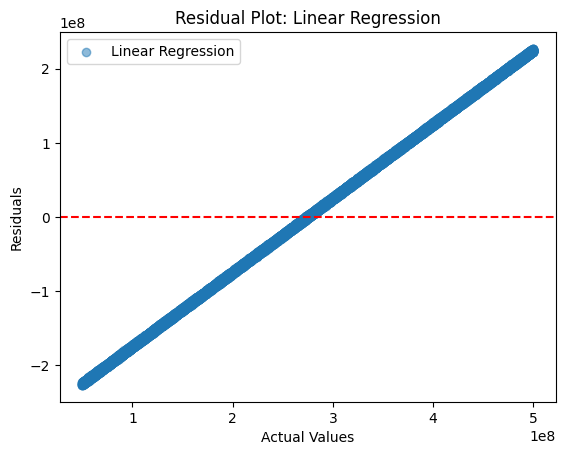

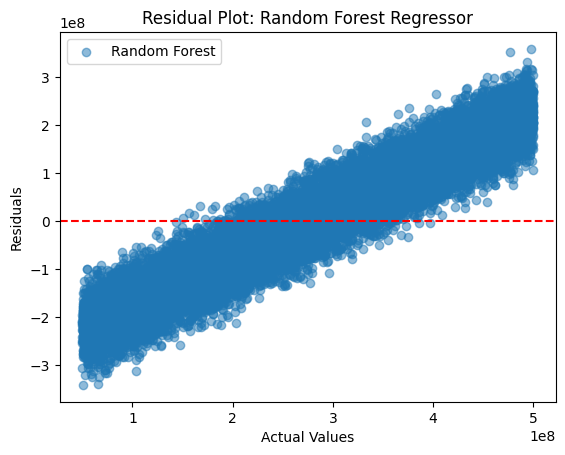

In [9]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Jalur file yang sudah diunggah dan disalin ke /tmp
file_path = '/tmp/dataset-car-sales.csv'  # Sesuaikan dengan nama file yang sudah diunggah

# Load dataset
try:
    data = pd.read_csv(file_path)
    print("Dataset berhasil dimuat!")
    print(data.head())  # Menampilkan 5 baris pertama untuk memastikan data terload
except FileNotFoundError:
    print("File tidak ditemukan di direktori /tmp.")
    data = None
except Exception as e:
    print(f"Terjadi kesalahan: {e}")
    data = None

# Fungsi untuk evaluasi model
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MAE: {mae:.2f}, MSE: {mse:.2f}, R2: {r2:.2f}")
    return {"MAE": mae, "MSE": mse, "R2": r2}

# Pastikan data telah berhasil dimuat sebelum melanjutkan
if data is not None:
    # Menggunakan Label Encoding untuk kolom kategorikal
    le = LabelEncoder()
    data['carTransmissionName'] = le.fit_transform(data['carTransmissionName'])

    # Feature selection (sesuaikan dengan kolom yang relevan dari dataset)
    X = data[['carYear', 'carMileage', 'carEngine', 'carTransmissionName']]  # Fitur-fitur yang digunakan untuk prediksi
    y = data['expSellingPrice']  # Target adalah harga jual yang diprediksi

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression Model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Predictions with Linear Regression
    y_pred_lr = lr_model.predict(X_test)

    # Evaluasi model Linear Regression
    linear_results = evaluate_model(y_test, y_pred_lr, "Linear Regression")

    # Random Forest Regressor Model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predictions with Random Forest Regressor
    y_pred_rf = rf_model.predict(X_test)

    # Evaluasi model Random Forest Regressor
    random_forest_results = evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

    # Plot residuals for Linear Regression
    residuals_linear = y_test - y_pred_lr
    plt.scatter(y_test, residuals_linear, alpha=0.5, label="Linear Regression")
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Residual Plot: Linear Regression")
    plt.xlabel("Actual Values")
    plt.ylabel("Residuals")
    plt.legend()
    plt.show()

    # Plot residuals for Random Forest Regressor
    residuals_rf = y_test - y_pred_rf
    plt.scatter(y_test, residuals_rf, alpha=0.5, label="Random Forest")
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Residual Plot: Random Forest Regressor")
    plt.xlabel("Actual Values")
    plt.ylabel("Residuals")
    plt.legend()
    plt.show()

else:
    print("Eksekusi dihentikan karena dataset tidak ditemukan.")


Dataset berhasil dimuat!
    brandName carCondition  carEngine                                 carId  \
0      Suzuki         Used       1785  289f29f6-de5e-4667-8b58-06d42701b465   
1       Honda         Used       1139  741b34b7-b6f5-46ac-8aa7-f4d75c0d6a33   
2      Toyota         Used       1350  adccfbae-d64a-40cd-a4b4-4acef350fcc0   
3      Nissan         Used       3418  642a1697-1466-49d1-b166-c094bf126e2a   
4  Mitsubishi         Used       1893  4d2f6dd3-486c-4232-abb9-733bc2a5d6d5   

  carListingDate  carMileage    carTag carTransmissionName carTypeName  \
0     2022-10-03       69018   dolorum           Automatic         SUV   
1     2023-05-08      132816  mollitia              Manual       Truck   
2     2022-09-05       12903      esse              Manual         MPV   
3     2023-01-09       62653      quod              Manual         MPV   
4     2022-11-18      102526   maiores              Manual         MPV   

   carYear colorName dealerTypeName  expSellingPrice fu

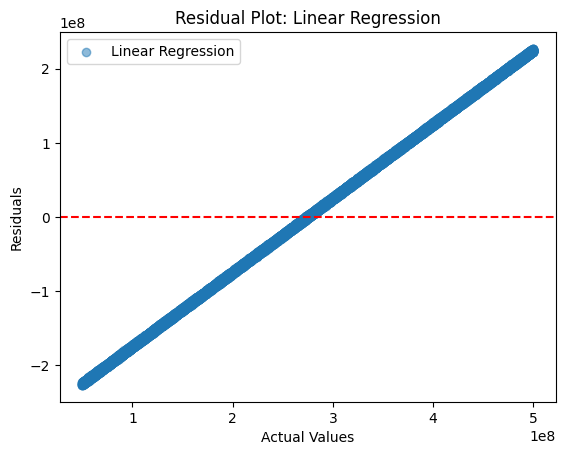

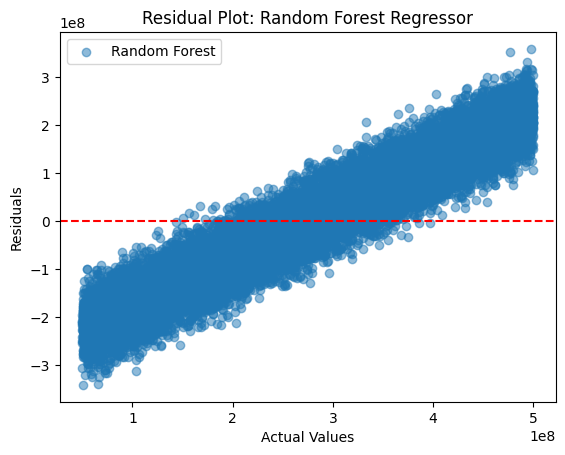

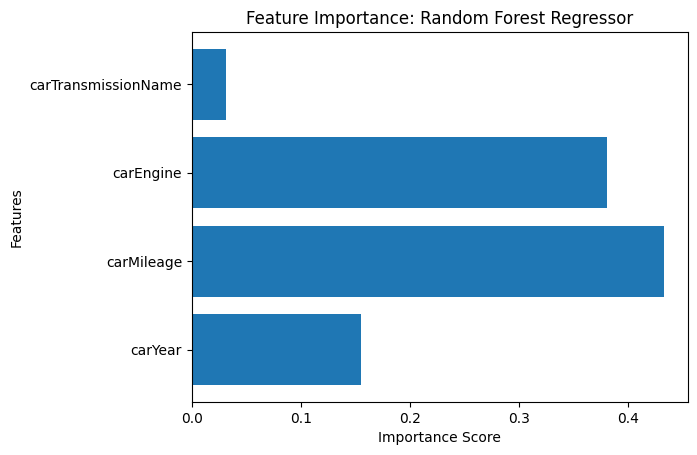

In [10]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Jalur file yang sudah diunggah dan disalin ke /tmp
file_path = '/tmp/dataset-car-sales.csv'  # Sesuaikan dengan nama file yang sudah diunggah

# Load dataset
try:
    data = pd.read_csv(file_path)
    print("Dataset berhasil dimuat!")
    print(data.head())  # Menampilkan 5 baris pertama untuk memastikan data terload
except FileNotFoundError:
    print("File tidak ditemukan di direktori /tmp.")
    data = None
except Exception as e:
    print(f"Terjadi kesalahan: {e}")
    data = None

# Fungsi untuk evaluasi model
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MAE: {mae:.2f}, MSE: {mse:.2f}, R2: {r2:.2f}")
    return {"MAE": mae, "MSE": mse, "R2": r2}

# Pastikan data telah berhasil dimuat sebelum melanjutkan
if data is not None:
    # Menggunakan Label Encoding untuk kolom kategorikal
    le = LabelEncoder()
    data['carTransmissionName'] = le.fit_transform(data['carTransmissionName'])

    # Feature selection (sesuaikan dengan kolom yang relevan dari dataset)
    X = data[['carYear', 'carMileage', 'carEngine', 'carTransmissionName']]  # Fitur-fitur yang digunakan untuk prediksi
    y = data['expSellingPrice']  # Target adalah harga jual yang diprediksi

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression Model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Predictions with Linear Regression
    y_pred_lr = lr_model.predict(X_test)

    # Evaluasi model Linear Regression
    linear_results = evaluate_model(y_test, y_pred_lr, "Linear Regression")

    # Random Forest Regressor Model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predictions with Random Forest Regressor
    y_pred_rf = rf_model.predict(X_test)

    # Evaluasi model Random Forest Regressor
    random_forest_results = evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

    # Plot residuals for Linear Regression
    residuals_linear = y_test - y_pred_lr
    plt.scatter(y_test, residuals_linear, alpha=0.5, label="Linear Regression")
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Residual Plot: Linear Regression")
    plt.xlabel("Actual Values")
    plt.ylabel("Residuals")
    plt.legend()
    plt.show()

    # Plot residuals for Random Forest Regressor
    residuals_rf = y_test - y_pred_rf
    plt.scatter(y_test, residuals_rf, alpha=0.5, label="Random Forest")
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Residual Plot: Random Forest Regressor")
    plt.xlabel("Actual Values")
    plt.ylabel("Residuals")
    plt.legend()
    plt.show()

    # Plot Feature Importance for Random Forest Regressor
    importances = rf_model.feature_importances_
    feature_names = X_train.columns
    plt.barh(feature_names, importances)
    plt.title("Feature Importance: Random Forest Regressor")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.show()

else:
    print("Eksekusi dihentikan karena dataset tidak ditemukan.")
